In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [32]:
train_processed_path = r'C:\Users\cardo\Projeto-House-Prices\data\processed\train_processed.csv'
test_processed_path = r'C:\Users\cardo\Projeto-House-Prices\data\processed\test_processed.csv'

In [33]:
df_train_processed = pd.read_csv(train_processed_path)
df_test_processed = pd.read_csv(test_processed_path)

In [34]:
X = df_train_processed.drop('SalePrice', axis=1)
y = df_train_processed['SalePrice']

In [61]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))
y_normalized = y_normalized.ravel()

# dividing data in test and train

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.3, random_state=42)

In [62]:
model = RandomForestRegressor(n_estimators=300, criterion='squared_error', max_depth=8, random_state=42)

# training the model

model.fit(X_train, y_train)

# predictions

y_pred = model.predict(X_test)

# model performance

mse = mean_squared_error(y_test, y_pred)
print('Mean Square Error:', mse)
rmse = np.sqrt(mse)
print('Root Mean Square Error:', rmse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolut Error:", mae)

Mean Square Error: 0.001685688328023663
Root Mean Square Error: 0.041057134922247836
Mean Absolut Error: 0.023808124245839217


<module 'matplotlib.pyplot' from 'C:\\Users\\cardo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

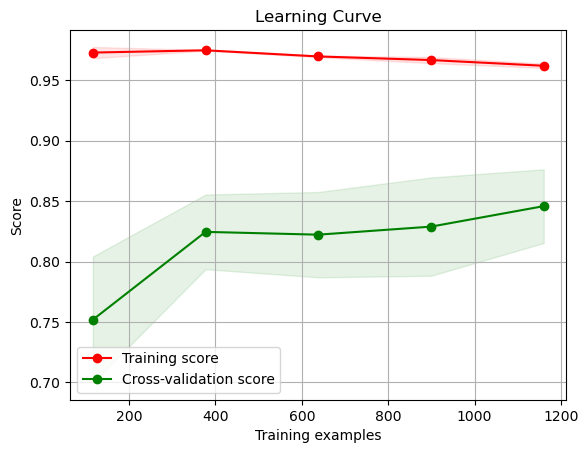

In [63]:
plot_learning_curve(model, "Learning Curve", X_normalized, y_normalized, cv=5)

In [23]:
X_test_normalized = scaler_X.transform(df_test_processed.drop('Id',axis = 1))

In [24]:
predictions_normalized = model.predict(X_test_normalized)
predictions_denormalized = scaler_y.inverse_transform(predictions_normalized.reshape(-1, 1))

In [25]:
df_results = pd.DataFrame({'Id': df_test_processed['Id'], 'SalePrice': predictions_denormalized.flatten()})

In [27]:
df_results.to_csv(r'C:\\Users\cardo\Projeto-House-Prices\data\final\random_forest_model.csv', index = False)

In [28]:
df_results

Id    SalePrice
0     1461  120559.3300
1     1462  147489.1250
2     1463  172200.4675
3     1464  187591.2075
4     1465  210681.4600
...    ...          ...
1454  2915   83882.5000
1455  2916   88969.0000
1456  2917  153284.2150
1457  2918  110080.8750
1458  2919  225277.3750

[1459 rows x 2 columns]

In [30]:
# Saving model

import joblib

joblib.dump(model, r'C:\\Users\cardo\Projeto-House-Prices\models\random_forest_model.pkl')

['C:\\\\Users\\cardo\\Projeto-House-Prices\\models\\random_forest_model.pkl']